In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('C:/Users/USER/Desktop/Bookings.csv')
data

,Unnamed: 0,Hotel_Name,Review,Total_Review,Rating,Location
0,0,Oakwood Residence Midtown East,Superb,28,9.1,Murray Hill
1,1,Murray Hill East Suites,Good,52,7.6,Murray Hill
2,2,The Herald 8 by LuxUrban,Good,"2,870",7.8,Manhattan
3,3,"The Cloud One New York-Downtown, by the Motel ...",Very good,975,8.3,Wall Street - Financial District
4,4,Pod Times Square,Very good,"13,951",8.1,Hell's Kitchen
...,...,...,...,...,...,...
520,520,Fantastic 3BR At Financial District,NaN,NaN,NaN,Wall Street - Financial District
521,521,3 Bedroom Apartment In Midtown East,NaN,NaN,NaN,Manhattan
522,522,2BD 1BA Apartment At Financial District,NaN,NaN,NaN,Wall Street - Financial District
523,523,2BD 1BA Apartment At Wall Street,NaN,NaN,NaN,Wall Street - Financial District


In [6]:
print("The shape of the data is", data.shape)

The shape of the data is (525, 6)


In [7]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hotel_Name    525 non-null    object 
 1   Review        325 non-null    object 
 2   Total_Review  325 non-null    object 
 3   Rating        315 non-null    float64
 4   Location      525 non-null    object 
dtypes: float64(1), object(4)
memory usage: 20.6+ KB


In [9]:
#Checking the null  values in the data
def checking_the_null_values(df):
    null_values=[col for col in df.columns if df[col].isna().sum()>0]
    mising_columns=df[null_values].isna().sum().sort_values(ascending=False)
    ration=(df[null_values].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    data=pd.concat([mising_columns,np.round(ration,2)],axis=1,keys=['Null values','Percentage'])
    data_frame=pd.DataFrame(data)
    return data_frame.style.background_gradient(cmap='Reds')
checking_the_null_values(data)

,Null values,Percentage
Rating,210,40.000000
Review,200,38.100000
Total_Review,200,38.100000


In [10]:
data.describe()

,Rating
count,315.000000
mean,7.883492
std,0.885183
min,1.000000
25%,7.500000
50%,8.000000
75%,8.400000
max,10.000000


# Observations:
+ From the above code we check the null values.3 columns have null values
+ we fill the null values with mean for numerical and mode for categorical values

In [11]:
#fill the null values with ffill method 
data['Total_Review']=data['Total_Review'].fillna('0',axis=0)
data['Rating']=data['Rating'].fillna(method='ffill',axis=0)
data['Review']=data['Review'].fillna(method='ffill',axis=0)

In [13]:
data.isna().sum()/len(data)

Hotel_Name      0.0
Review          0.0
Total_Review    0.0
Rating          0.0
Location        0.0
dtype: float64

In [18]:
# covert the Total_Review into integer format and covert the data type using astype function
data['Total_Review']=data['Total_Review'].str.replace(',','')
data['Total_Review']=data['Total_Review'].str.replace('1 review','1')
data['Total_Review']=data['Total_Review'].str.replace('65 external  ','65')
data['Total_Review']=data['Total_Review'].str.replace('22 external  ','22')
data['Total_Review']=data['Total_Review'].str.replace('3 external  ','3')
data['Total_Review']=data['Total_Review'].str.replace('14 external  ','14')
data['Total_Review']=data['Total_Review'].str.replace('7 external  ','7')
data['Total_Review']=data['Total_Review'].str.replace('4 external  ','4')
data['Total_Review']=data['Total_Review'].str.replace('13 external  ','13')
data['Total_Review']=data['Total_Review'].str.replace('22 external  ','22')
data['Total_Review']=data['Total_Review'].astype('int64')

# Explore Data Analysis Process
+ In the Process we do some data Preprocessing steps the rating should be converted into 5 and create a new columns
+ The first visualize the Rating columns using bar plots and identfiy the which rating most people posted
+ To visulize the top 10 total_reviews colums using the bar plots
* And the next we visualize the Reviews in the data using the bar chart's

In [19]:
#Let's create a new column all rating should be 5 
data['rating_5']=data['Rating']//2
data.head(2)

,Hotel_Name,Review,Total_Review,Rating,Location,rating_5
0,Oakwood Residence Midtown East,Superb,28,9.1,Murray Hill,4.0
1,Murray Hill East Suites,Good,52,7.6,Murray Hill,3.0


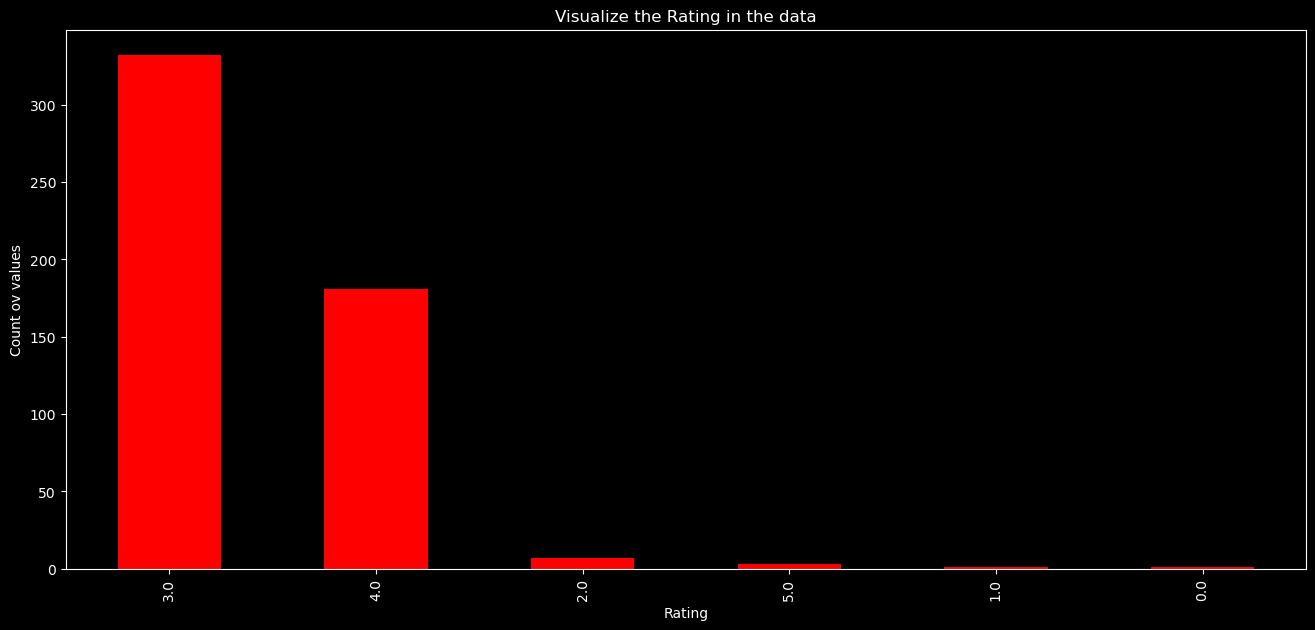

In [23]:
#Visualize the rating_5 
plt.rcParams['figure.facecolor']='gray'
plt.style.use(['dark_background'])
data['rating_5'].value_counts()\
.sort_values(ascending=False)\
.plot(kind='bar',figsize=(16,7),title="Visualize the Rating in the data",color='r')
plt.xlabel("Rating")
plt.ylabel("Count ov values")
plt.show()

# Observations:
1. From the above chart most of the hotels have 3 rating and second place goes to 4.0 rating

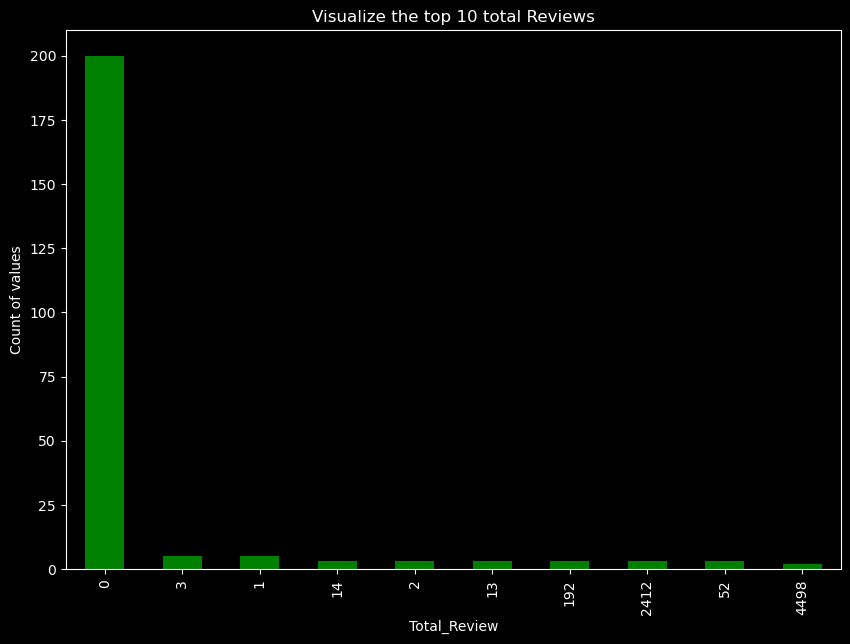

In [24]:
#Visualize the top 10 total reviews on the data 
data['Total_Review'].value_counts().sort_values(ascending=False).nlargest(10)\
.plot(kind='bar',title="Visualize the top 10 total Reviews",figsize=(10,7),color='g')
plt.xlabel("Total_Review")
plt.ylabel("Count of values")
plt.show()

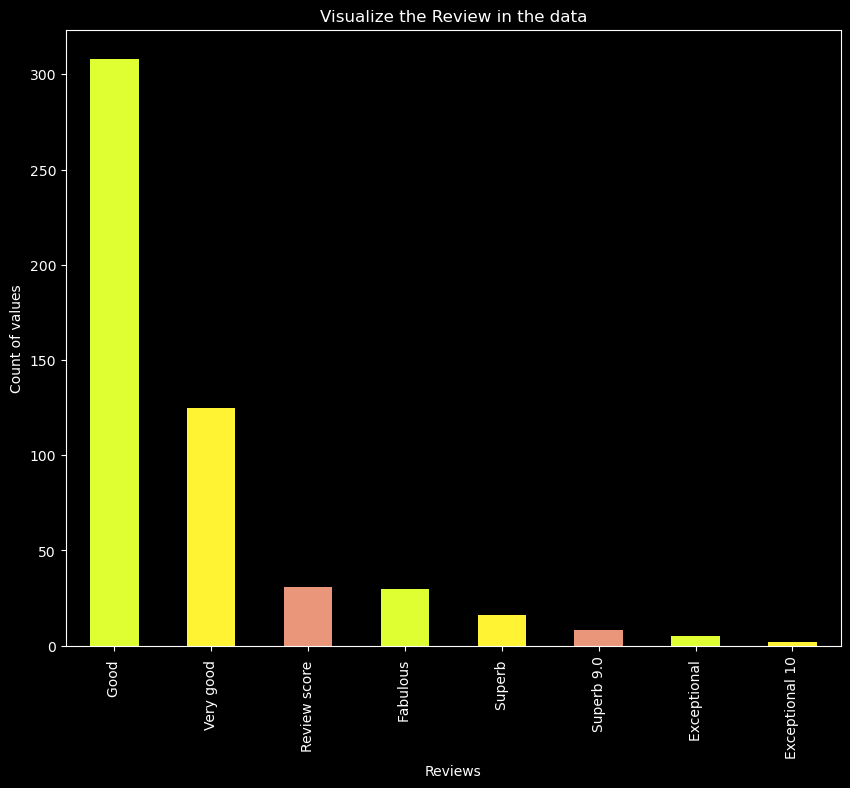

In [25]:
#To visualize the reviews in the data set using the value counts function
data['Review'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,8),title="Visualize the Review in the data",color=['#E0FF33','#FFF333','#E9967A'])
plt.xlabel("Reviews")
plt.ylabel("Count of values")
plt.show()

# Observation of the above two charts
+ From the total_reviews chart most of the reviews are nullved but we replace as 0 insted of null
+ And 3 reviews repeted as around 18 times
+ The Second chart have "Good" have more hotles and the second hotels have "very good" reviews
+ And "Exceptional" have the least rating

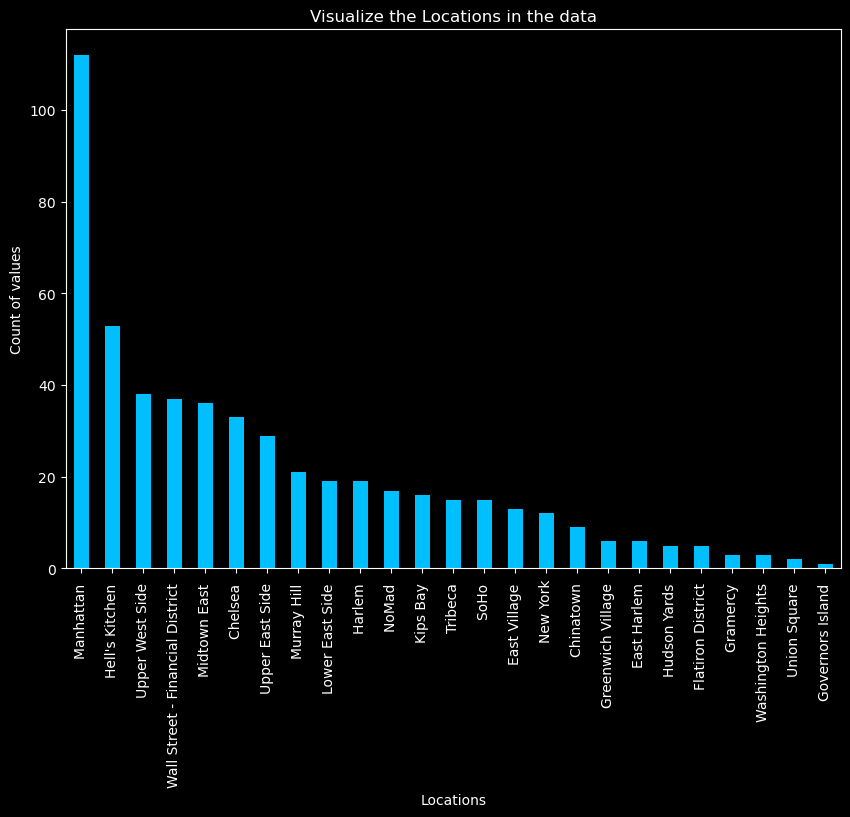

In [26]:
# Visualize the Locations in the data
data['Location'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,7),title="Visualize the Locations in the data",color=['#00BFFF'])
plt.xlabel("Locations")
plt.ylabel("Count of values")
plt.show()

In [27]:
data.groupby('Review')['rating_5'].value_counts()\
.unstack()\
.style.background_gradient(cmap='RdBu_r')

rating_5,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
Review,,,,,,
Exceptional,nan,nan,nan,2.000000,2.000000,1.000000
Exceptional 10,nan,nan,nan,1.000000,1.000000,nan
Fabulous,nan,nan,nan,2.000000,28.000000,nan
Good,nan,1.000000,nan,285.000000,22.000000,nan
Review score,nan,nan,6.000000,19.000000,5.000000,1.000000
Superb,nan,nan,nan,6.000000,10.000000,nan
Superb 9.0,1.000000,nan,nan,6.000000,1.000000,nan
Very good,nan,nan,1.000000,11.000000,112.000000,1.000000


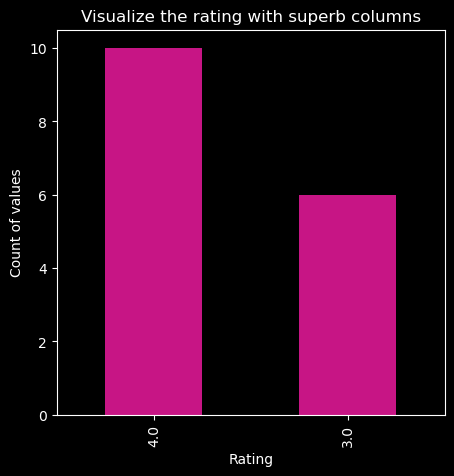

In [28]:
# To visualize the superb reives in the data
'''What is happend in the we create a data frame for superb columns and 
with loc the data frame with rating values and visualize it.
'''
felt=data['Review']=='Superb '
data.loc[felt]['rating_5'].value_counts()\
.plot(kind='bar',figsize=(5,5),title="Visualize the rating with superb columns",color="#C71585")
plt.xlabel("Rating")
plt.ylabel("Count of values")
plt.show()

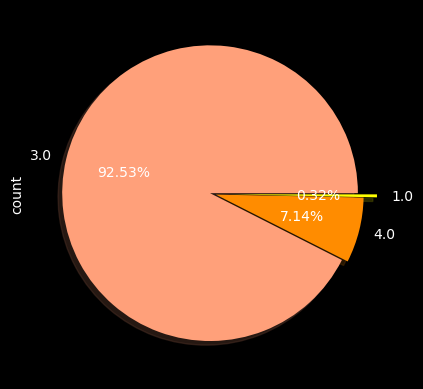

In [30]:
'''To visualize the Good reviews in the data from the data
we loc the data and visualize with rating with pie charts'''
good=data['Review']=='Good '
data.loc[good]['rating_5'].value_counts()\
.plot(kind='pie',explode=[0.03,0.01,0.1],
    labels=["3.0","4.0","1.0"],
    colors=['#FFA07A','#FF8C00','#FFFF00'],
    autopct='%1.2f%%',
    shadow=True);

# Observations:
+ From the above charts we create a new data with good and superb values and visualize it pie and bar chats'
+ In the first chart's 4.0 rating have most ratings and 3.0 have less rating of the review superb
+ In the second graph 3.0 have most frequensed using rating with good reviews and second place goes to 4.0 and 0.3 at the least place

In [31]:
location=data.groupby('Location')
location.head()

,Hotel_Name,Review,Total_Review,Rating,Location,rating_5
0,Oakwood Residence Midtown East,Superb,28,9.1,Murray Hill,4.0
1,Murray Hill East Suites,Good,52,7.6,Murray Hill,3.0
2,The Herald 8 by LuxUrban,Good,2870,7.8,Manhattan,3.0
3,"The Cloud One New York-Downtown, by the Motel ...",Very good,975,8.3,Wall Street - Financial District,4.0
4,Pod Times Square,Very good,13951,8.1,Hell's Kitchen,4.0
...,...,...,...,...,...,...
390,E Village 1BR w WD on prime corner NYC-858,Good,0,7.0,East Village,3.0
402,139-2W Prime west village Furnished 2BR Best v...,Good,0,7.0,Greenwich Village,3.0
408,117-2 Modern Extra Large 3BR,Good,0,7.0,East Harlem,3.0
447,3BR Greenwich Condo Ikebana by RoveTravel,Good,0,7.0,Greenwich Village,3.0


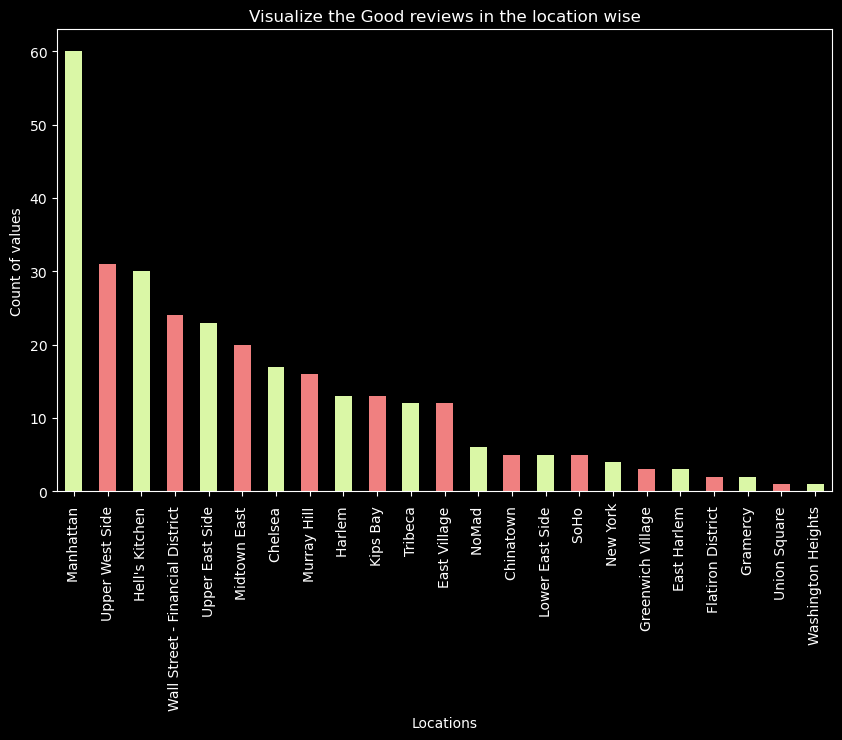

In [32]:
#Visualize the good location in the data using the groupby and loc function
data.groupby('Review')['Location'].value_counts().loc['Good ']\
.plot(kind='bar',title="Visualize the Good reviews in the location wise",figsize=(10,6),color=['#DAF7A6','#F08080'])
plt.xlabel("Locations")
plt.ylabel("Count of values")
plt.show()

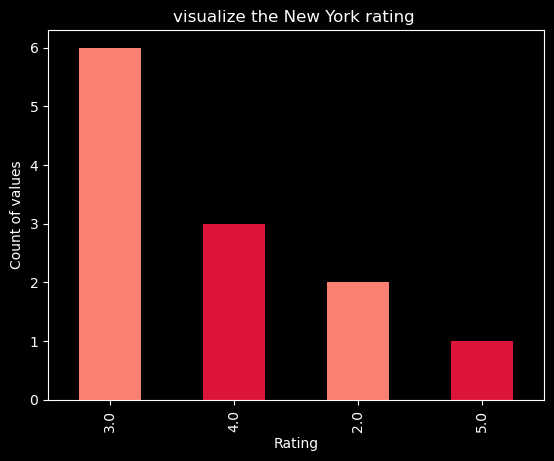

In [33]:
#Visualize the New York location rating using the loc functions
data.groupby('Location')['rating_5'].value_counts().loc['New York']\
.sort_values(ascending=False)\
.plot(kind='bar',title="visualize the New York rating ",color=['#FA8072','#DC143C'])
plt.xlabel("Rating")
plt.ylabel("Count of values")
plt.show()

# Observations:
+ From the two chart we visualize the Reviews with location and rating on the New York city with bar charts.
+ The first chart visualize the good review with location wise Manhatan have the highest good rating
+ In the second bar the new york city have more rating 3.0 and 4.0 is the second rating in the bar chat

In [35]:
# Hotel with the maximum reviews
max_reviews_hotel = data.loc[data['Total_Review'].idxmax()]['Hotel_Name']
print("Hotel with maximum reviews:", max_reviews_hotel)

Hotel with maximum reviews: Hyatt Place New York City/Times Square


In [36]:
# Hotel with the maximum reviews
max_reviews_hotel = data.loc[data['Total_Review'].idxmax()]['Hotel_Name']
print("Hotel with maximum reviews:", max_reviews_hotel)

Hotel with maximum reviews: Hyatt Place New York City/Times Square


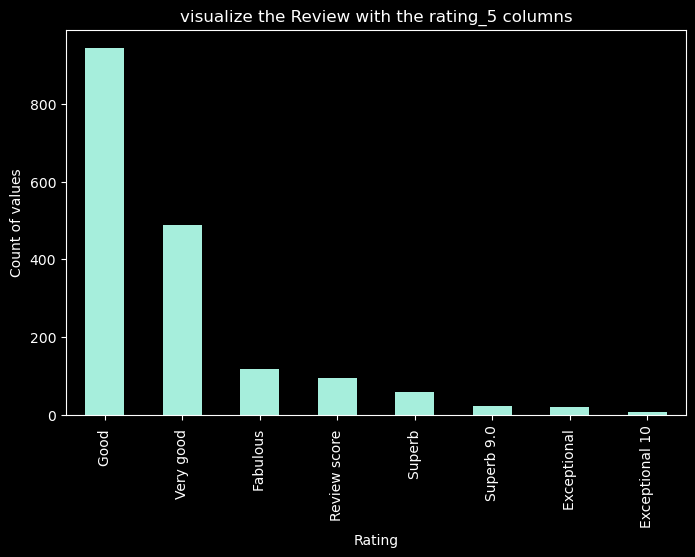

In [37]:
'''
Visualize the Review with the rating columns and sort the values and visualize with bar charts
'''
data.groupby('Review')['rating_5'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,5),title="visualize the Review with the rating_5 columns",color=['#A6EEDC'])
plt.xlabel("Rating")
plt.ylabel("Count of values")
plt.show()

In [38]:
newyork=data['Location']=='New York'
data.loc[newyork][['Hotel_Name','rating_5']].value_counts().sort_values()

Hotel_Name                                              rating_5
ASIATEL HOTEL                                           2.0         1
Airy Midtown E 1BR w Doorman nr UN NYC-894              3.0         1
FiDi Studio w Residents Bar Golf Simulator Gym NYC-271  5.0         1
Graduate New York                                       3.0         1
LIC 2BR w Doorman Gym Pool nr E River NYC-689           3.0         1
LIC 2BR w WD Elevator Doorman nr E River NYC-766        3.0         1
Midtown 1BR w Gym Doorman nr Central Park NYC-510       4.0         1
SoHo 2BR w WD Balcony nr Whole Foods NYC-892            2.0         1
UES 1BR w Gym Doorman nr Carl Schurz Park NYC-653       3.0         1
UES studio w elevator doorman nr Central Park NYC-1038  4.0         1
UWS 1BR w Gym Walk to Central Park NYC-165              4.0         1
WJK                                                     3.0         1
Name: count, dtype: int64

In [39]:
data.head(1)

,Hotel_Name,Review,Total_Review,Rating,Location,rating_5
0,Oakwood Residence Midtown East,Superb,28,9.1,Murray Hill,4.0
